In [25]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import awesome_functions as cf

slack_url = pickle.load(open('slackUrl.pickle', 'rb'))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
import pickle

In [3]:
train_preprocess = pickle.load(open("preprocess_date.pkl", "rb"))

In [4]:
weather_refined = pd.read_csv("weather+holyday_201807041434.csv")

In [5]:
weather_refined_drop = weather_refined.drop(["year","month","day","weekday","holiday","sunrise","sunset","snowfall","sealevel","codesum"], axis=1)
weather_refined_drop.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
19660,20,2014-10-27,85,66,75,6,59,65,0,10,0.0,29.11,10.0,18.0,10.4
19661,20,2014-10-28,80,68,74,5,60,65,0,9,0.0,29.30,3.1,36.0,6.4
19662,20,2014-10-29,78,55,66,-2,47,56,0,1,0.0,29.42,4.9,6.0,6.1
19663,20,2014-10-30,80,52,66,-2,50,57,0,1,0.0,29.40,1.6,14.0,4.9
19664,20,2014-10-31,68,50,59,-9,39,50,6,0,0.0,29.57,10.5,36.0,11.2


In [6]:
total = train_preprocess.merge(weather_refined_drop, on=["date", "station_nbr"], how='inner')
total.tail()

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
229225,2014-10-30,39,111,3,1.386294,2014-10-30,8,0.0,0.0,3,...,-1,60,63,0,5,0.0,29.74,0.30,11.0,0.2
229226,2014-10-31,39,9,12,2.564949,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229227,2014-10-31,39,36,3,1.386294,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229228,2014-10-31,39,103,4,1.609438,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229229,2014-10-31,39,111,2,1.098612,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1


In [7]:
import statsmodels.api as sm

In [8]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):scale(tavg) + C(item_nbr):C(month) + C(item_nbr):C(is_weekend) + C(item_nbr):C(is_holiday)", data=total)

In [9]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     808.2
Date:                Fri, 06 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:02:55   Log-Likelihood:            -2.2449e+05
No. Observations:              229230   AIC:                         4.527e+05
Df Residuals:                  227394   BIC:                         4.716e+05
Df Model:                        1835                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [56]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):scale(tavg) + C(item_nbr):C(month) + C(item_nbr):C(is_weekend)", data=total)

In [57]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     858.2
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:30:57   Log-Likelihood:            -2.2461e+05
No. Observations:              229230   AIC:                         4.527e+05
Df Residuals:                  227502   BIC:                         4.705e+05
Df Model:                        1727                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

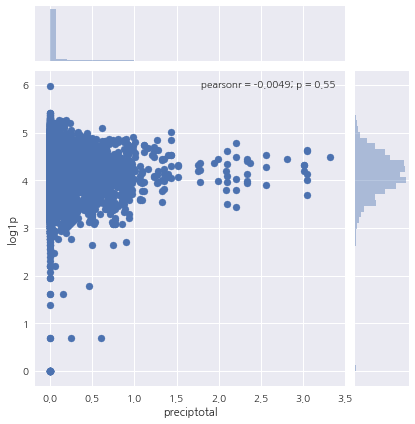

In [23]:
plt.figure(figsize=(12, 5))
sns.jointplot(x="preciptotal", y="log1p", data=total[total["item_nbr"]==45][["log1p", "preciptotal"]])
plt.show()

In [15]:
def getYearMonth(a):
    a = str(a)[:7]
    return a

In [16]:
total_copy = total.copy()

In [17]:
total_copy["yearmonth"] = total_copy["date"].apply(getYearMonth)

In [18]:
total_copy.tail()

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed,yearmonth
229225,2014-10-30,39,111,3,1.386294,2014-10-30,8,0.0,0.0,3,...,60,63,0,5,0.0,29.74,0.30,11.0,0.2,2014-10
229226,2014-10-31,39,9,12,2.564949,2014-10-31,8,0.0,0.0,4,...,38,65,0,1,0.0,29.82,11.55,20.5,5.1,2014-10
229227,2014-10-31,39,36,3,1.386294,2014-10-31,8,0.0,0.0,4,...,38,65,0,1,0.0,29.82,11.55,20.5,5.1,2014-10
229228,2014-10-31,39,103,4,1.609438,2014-10-31,8,0.0,0.0,4,...,38,65,0,1,0.0,29.82,11.55,20.5,5.1,2014-10
229229,2014-10-31,39,111,2,1.098612,2014-10-31,8,0.0,0.0,4,...,38,65,0,1,0.0,29.82,11.55,20.5,5.1,2014-10


In [43]:
total[total["units"]>1000]

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
161826,2012-11-15,37,5,5568,8.624971,2012-11-15,13,0.0,0.0,3,...,-7,26,31,31,0,0.00,24.48,2.5,15.0,4.8
174570,2013-11-21,37,5,3369,8.122668,2013-11-21,13,0.0,0.0,3,...,-22,11,14,46,0,0.08,24.47,7.0,2.0,7.5


In [30]:
total_1 = total[total["units"]<3000]

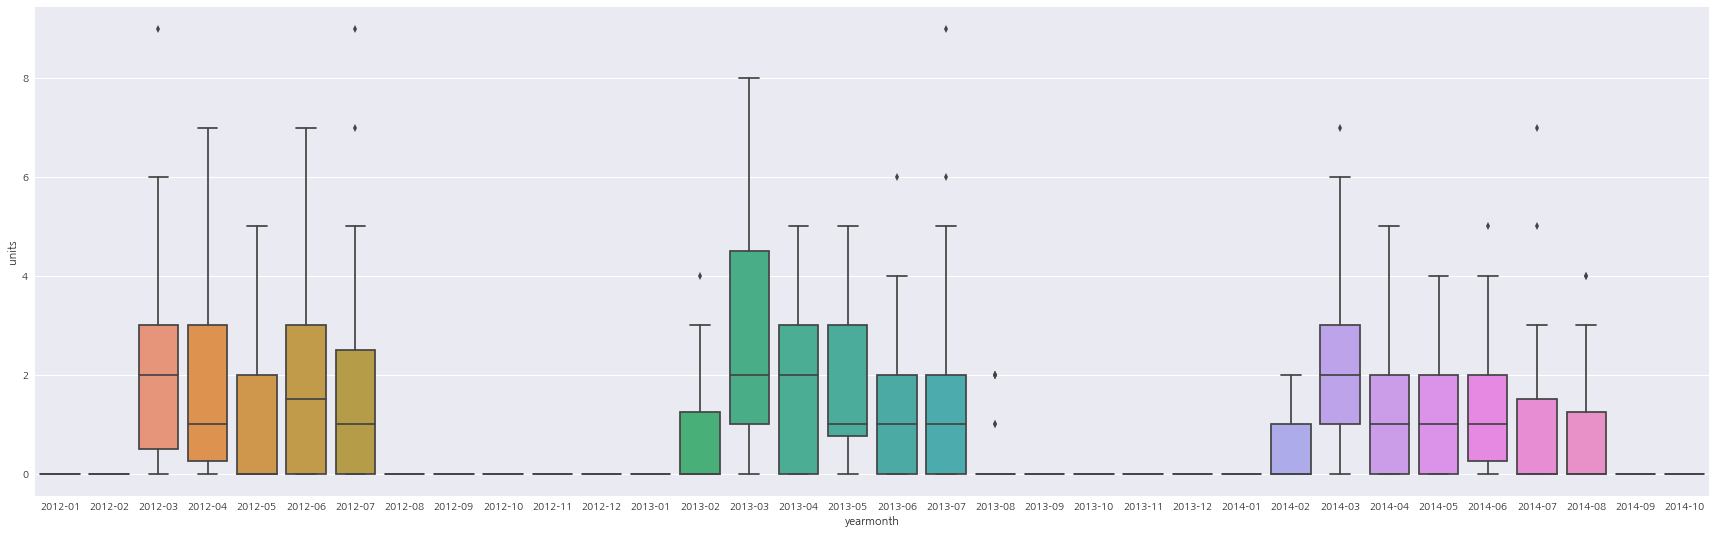

In [41]:
total_copy_item_1 = total_copy[total["item_nbr"] == 1]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_1[["yearmonth", "units"]])

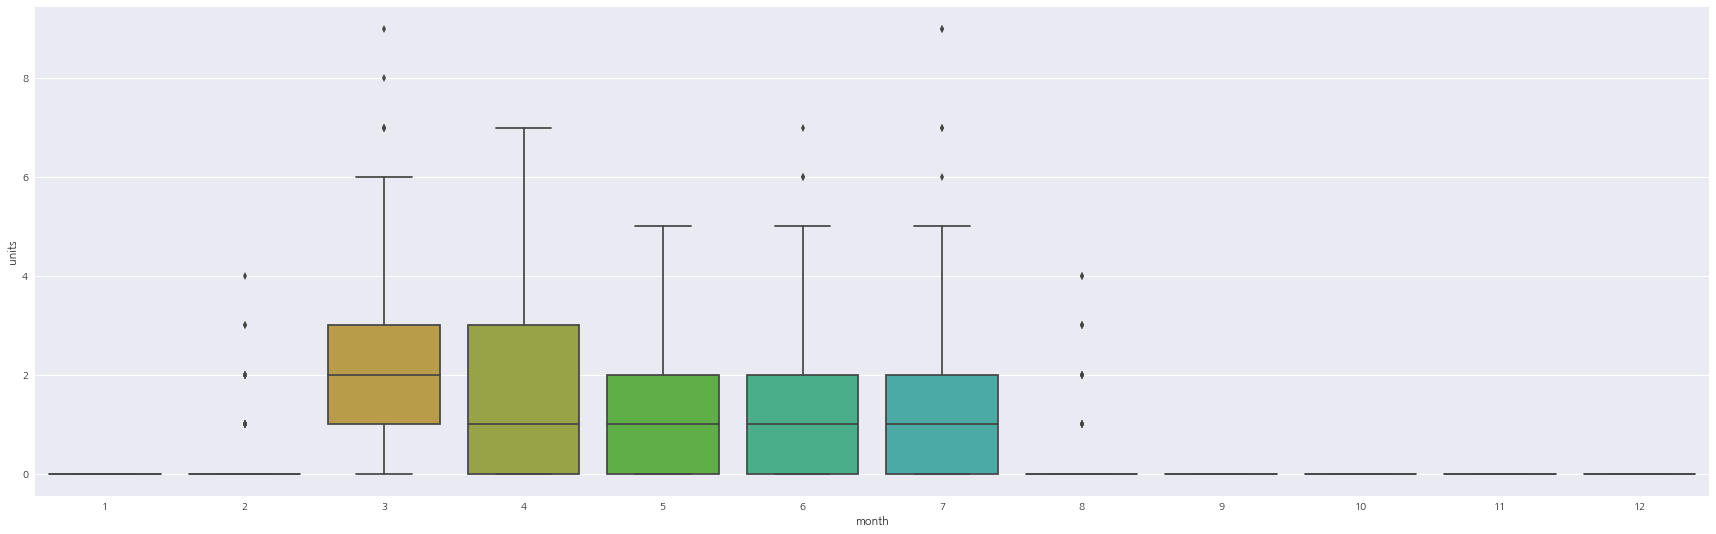

In [66]:
total_copy_item_1 = total_copy[total["item_nbr"] == 1]
plt.figure(figsize=(30,9))
sns.boxplot(x="month", y="units", data=total_copy_item_1[["month", "units"]])

In [ ]:
# total_copy_item_1 = total_copy[total["item_nbr"] == 1]
# total_copy_item_1.pivot_table("units","yearmonth")

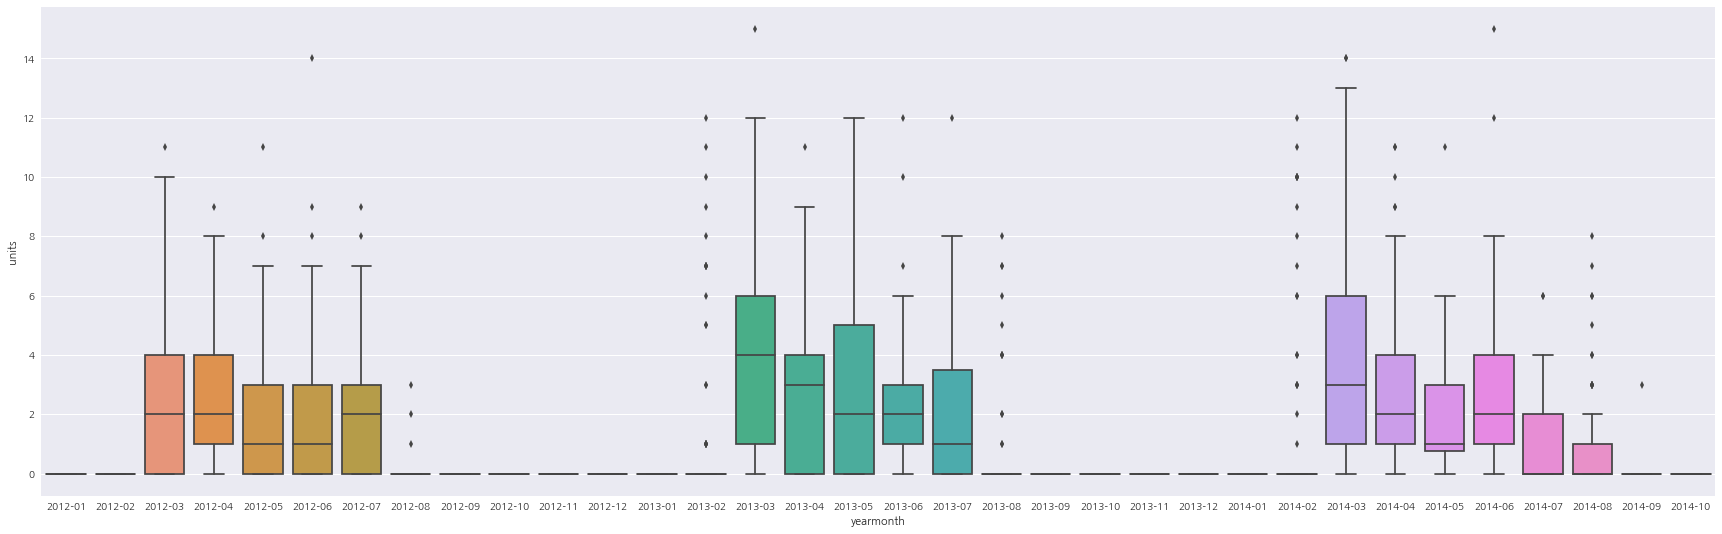

In [40]:
total_copy_item_2 = total_copy[total["item_nbr"] == 2]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_2[["yearmonth", "units"]])

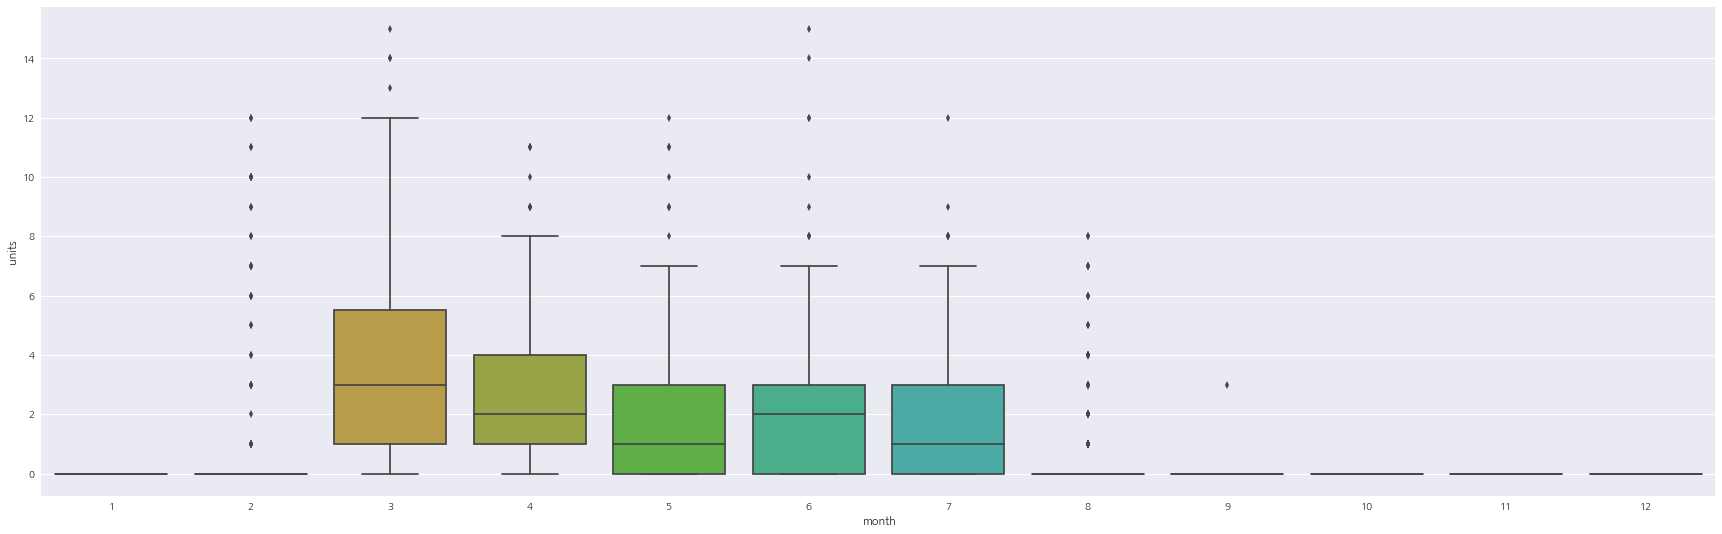

In [67]:
total_copy_item_2 = total_copy[total["item_nbr"] == 2]
plt.figure(figsize=(30,9))
sns.boxplot(x="month", y="units", data=total_copy_item_2[["month", "units"]])

In [ ]:
# total_copy_item_2 = total_copy[total["item_nbr"] == 2]
# total_copy_item_2.pivot_table("units","yearmonth")

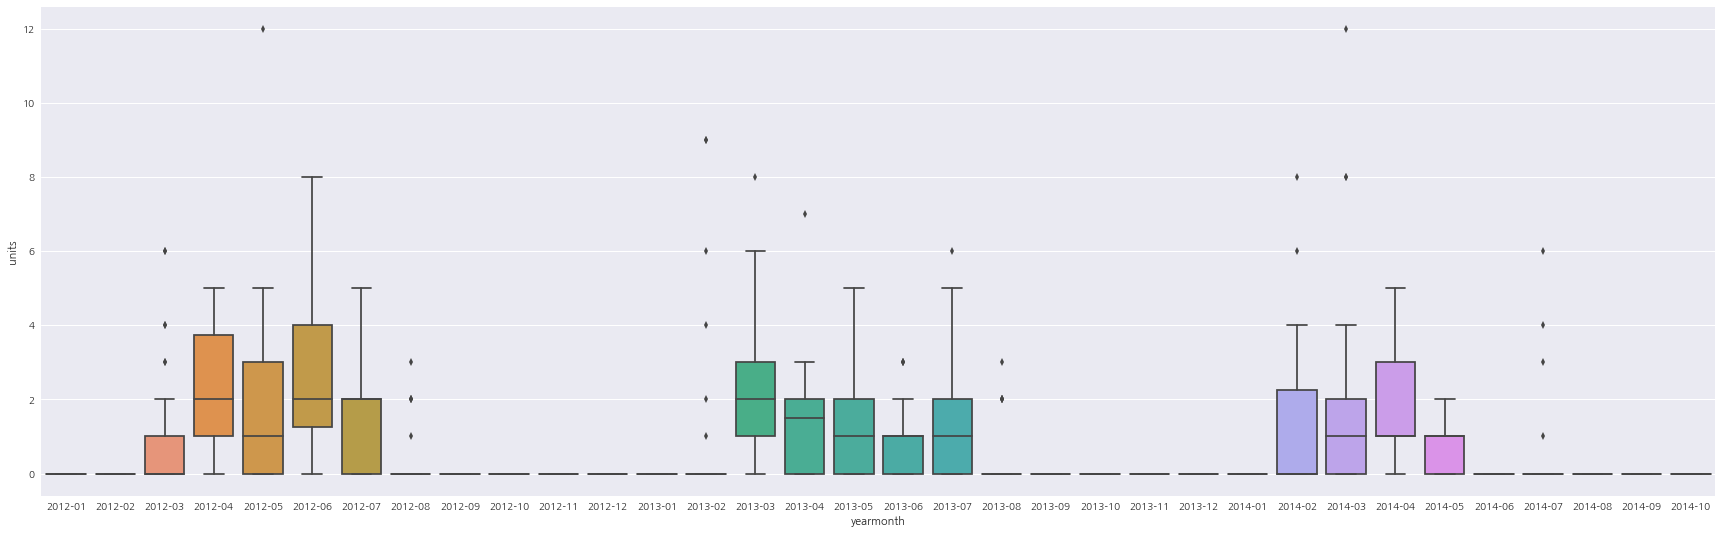

In [38]:
total_copy_item_3 = total_copy[total["item_nbr"] == 3]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_3[["yearmonth", "units"]])

In [ ]:
# total_copy_item_3 = total_copy[total["item_nbr"] == 3]
# total_copy_item_3.pivot_table("units","yearmonth")

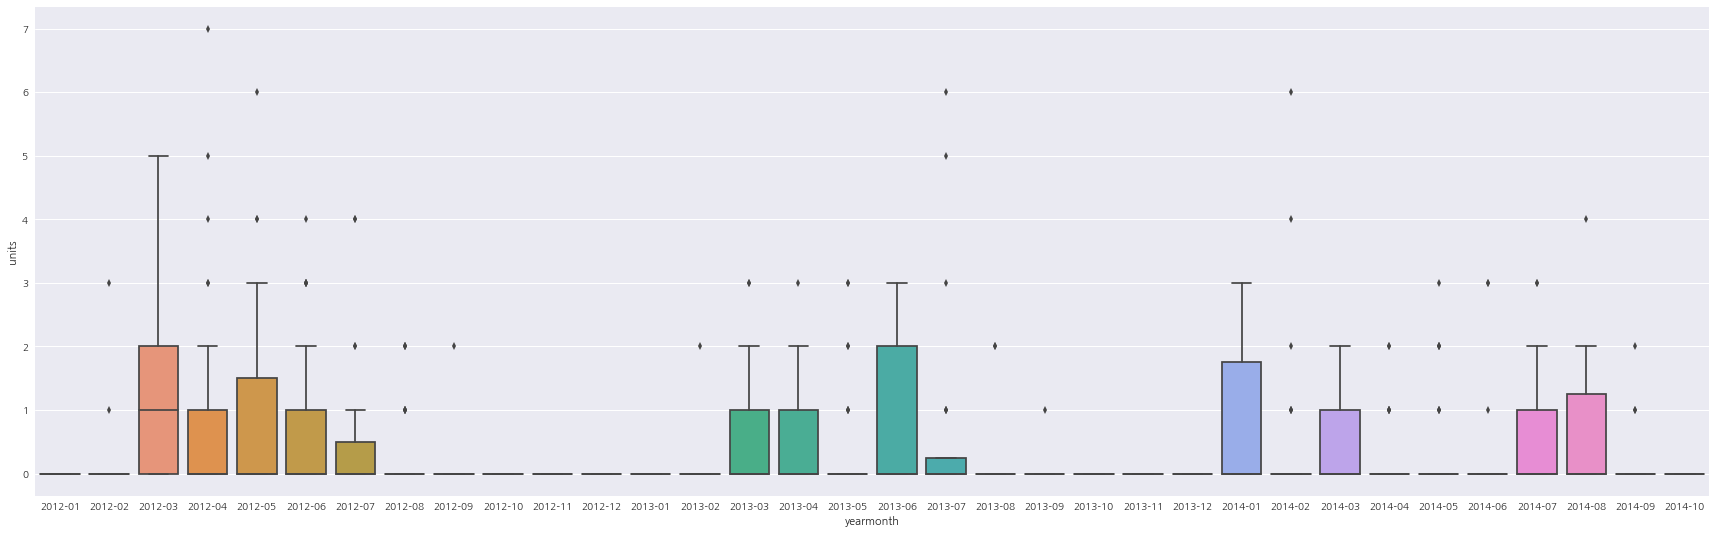

In [45]:
total_copy_item_4 = total_copy[total["item_nbr"] == 4]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_4[["yearmonth", "units"]])

In [ ]:
# total_copy_item_4 = total_copy[total["item_nbr"] == 4]
# total_copy_item_4.pivot_table("units","yearmonth")

In [56]:
total_1 = total[total["units"]<1000]

In [57]:
total_1["yearmonth"] = total_1["date"].apply(getYearMonth)

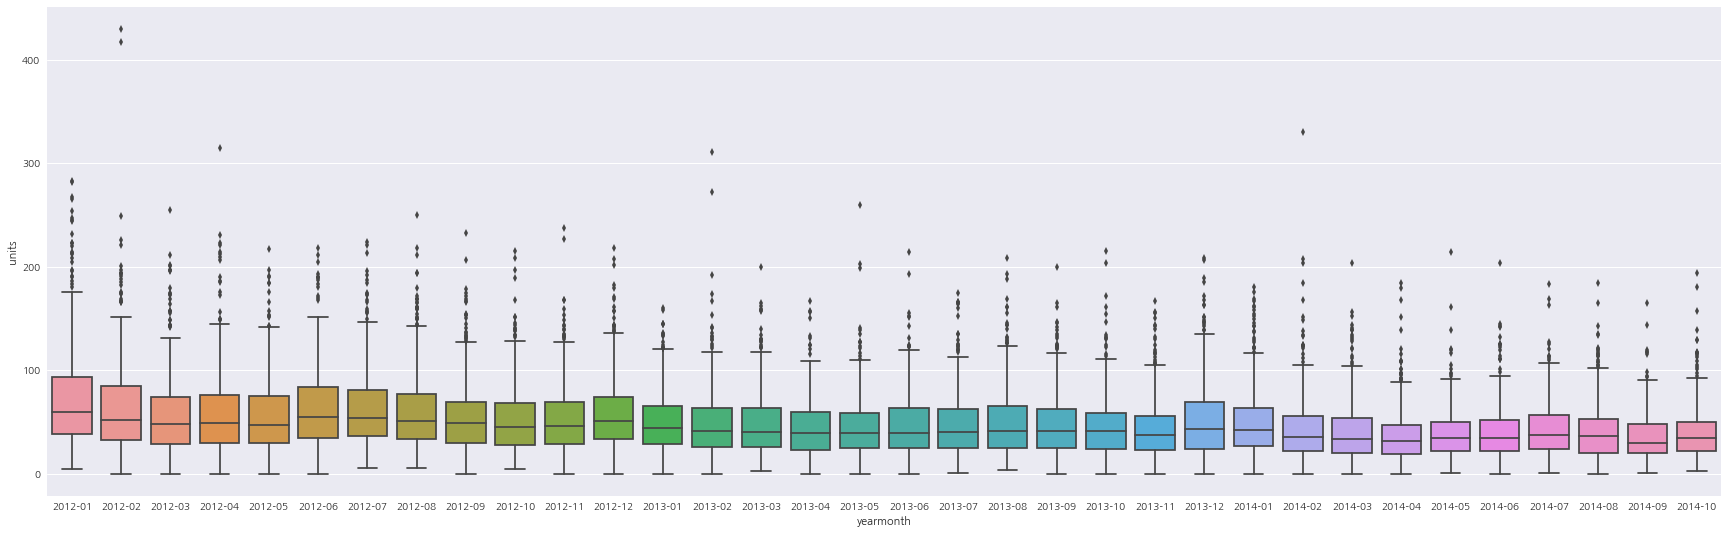

In [58]:
total_copy_item_5 = total_1[total_1["item_nbr"] == 5]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_5[["yearmonth", "units"]])

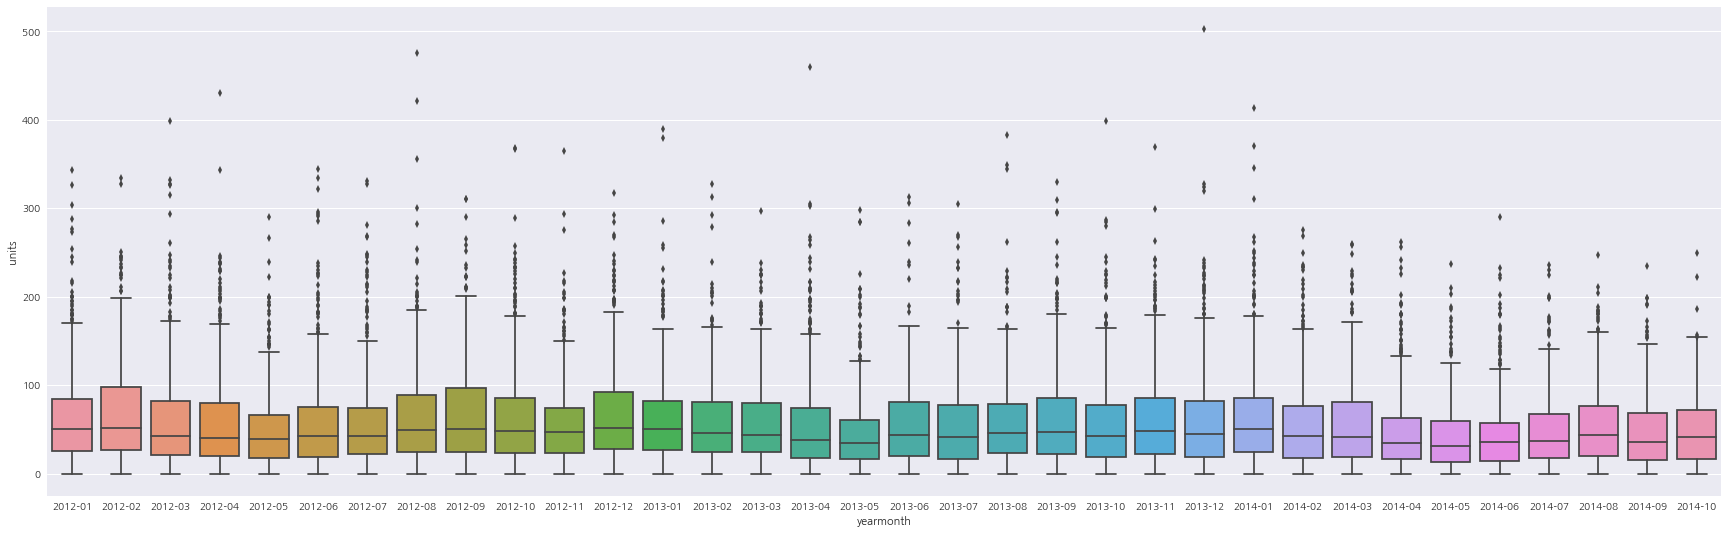

In [61]:
total_copy_item_9 = total_copy[total["item_nbr"] == 9]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_9[["yearmonth", "units"]])

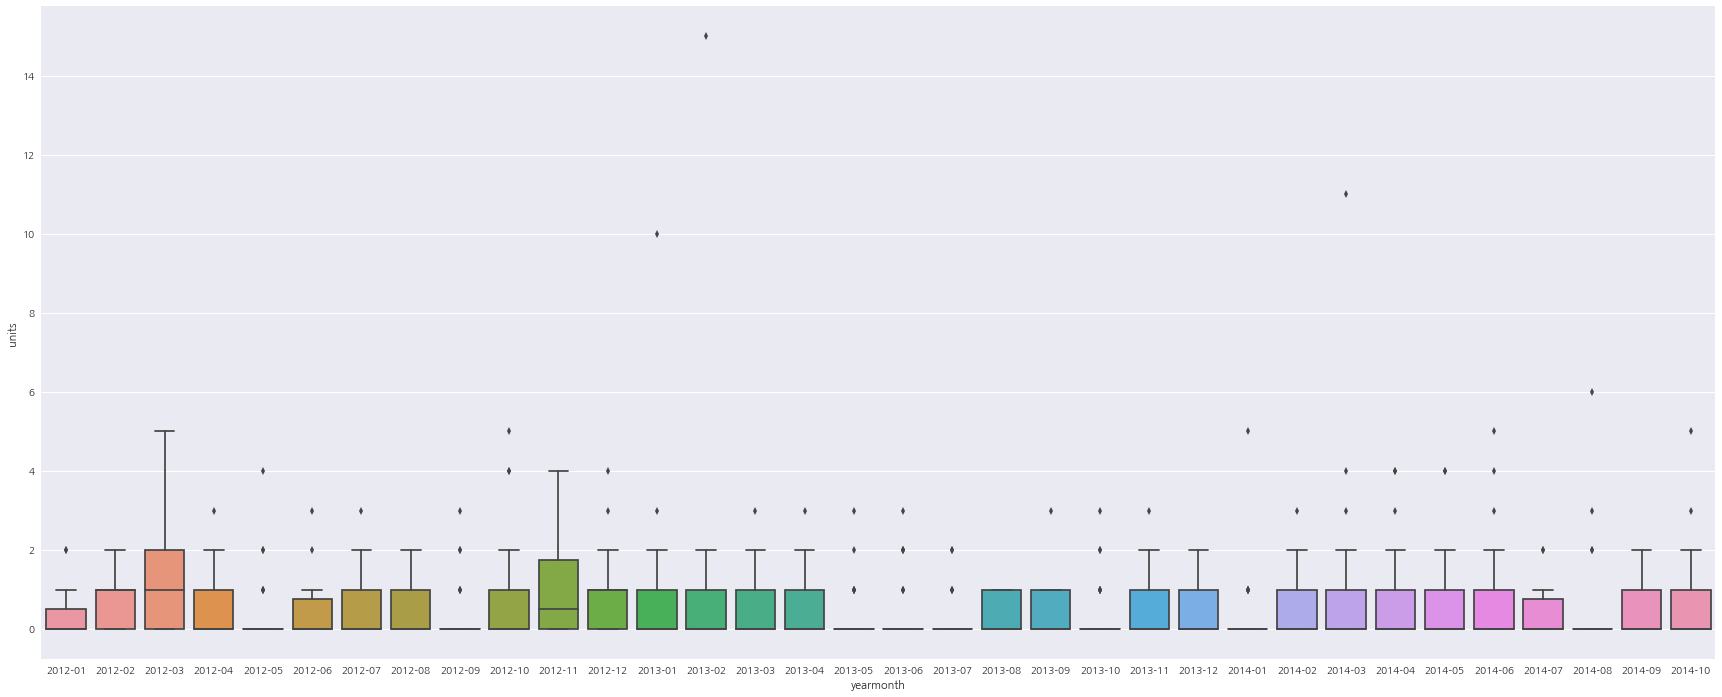

In [65]:
total_copy_item_12 = total_copy[total["item_nbr"] == 12]
plt.figure(figsize=(30,12))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_12[["yearmonth", "units"]])

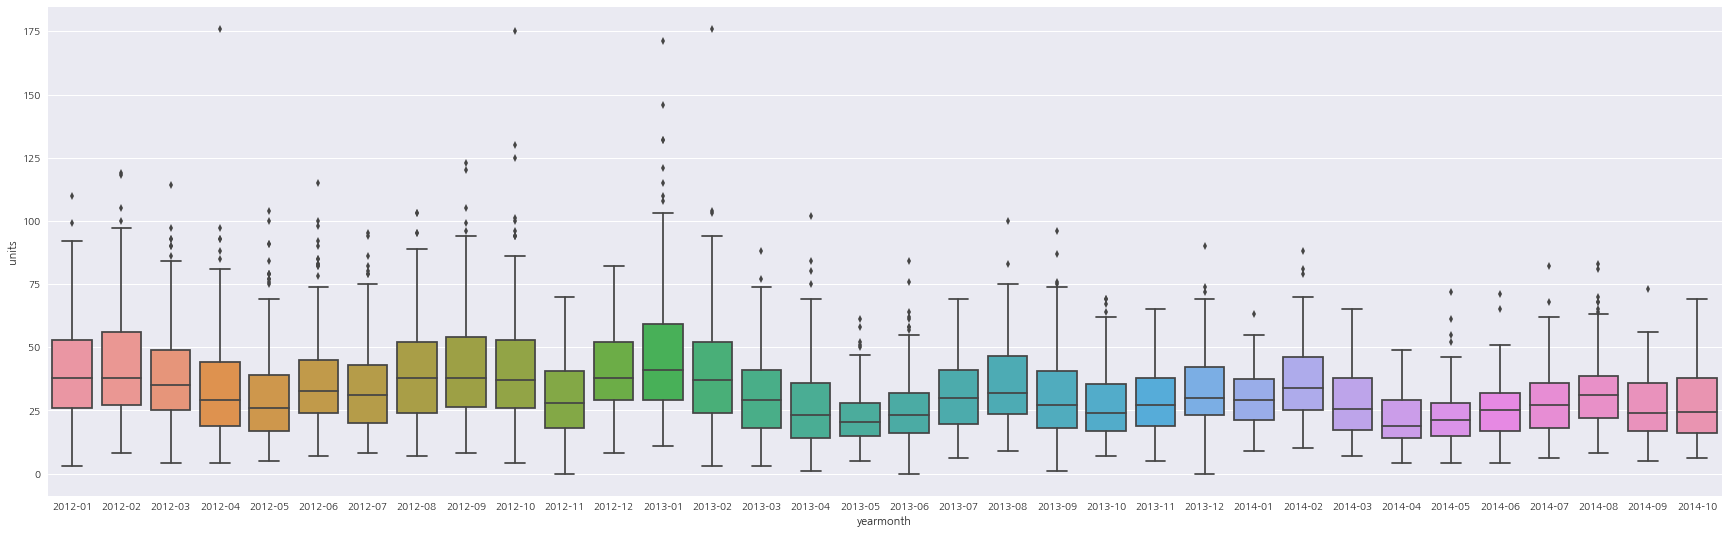

In [62]:
total_copy_item_16 = total_copy[total["item_nbr"] == 16]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_16[["yearmonth", "units"]])

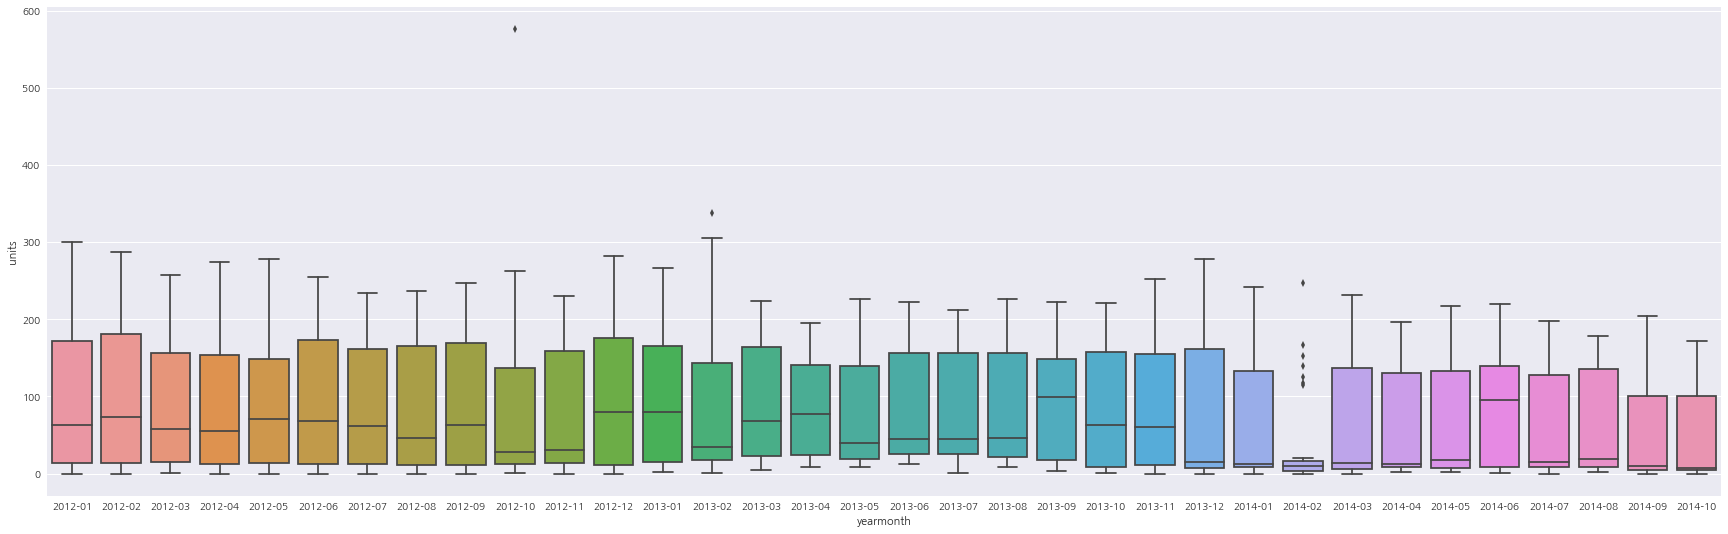

In [63]:
total_copy_item_25 = total_copy[total["item_nbr"] == 25]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_25[["yearmonth", "units"]])

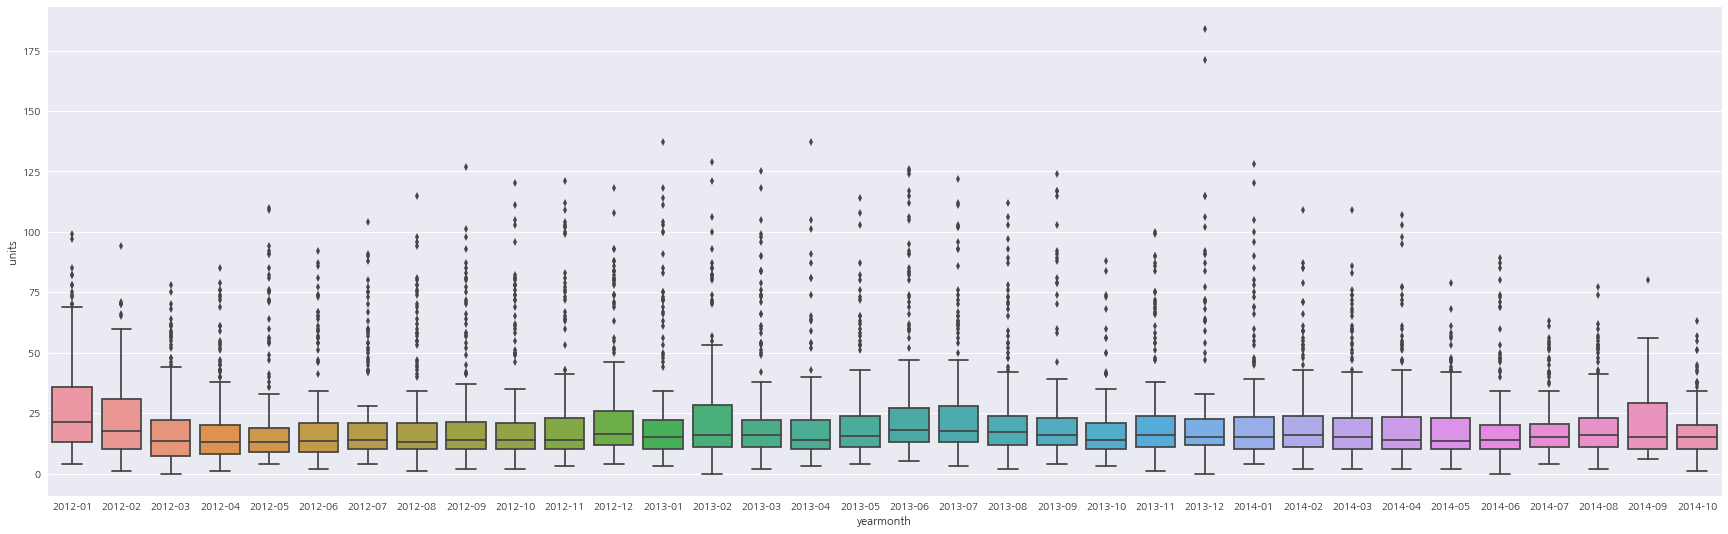

In [64]:
total_copy_item_37 = total_copy[total["item_nbr"] == 37]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_37[["yearmonth", "units"]])

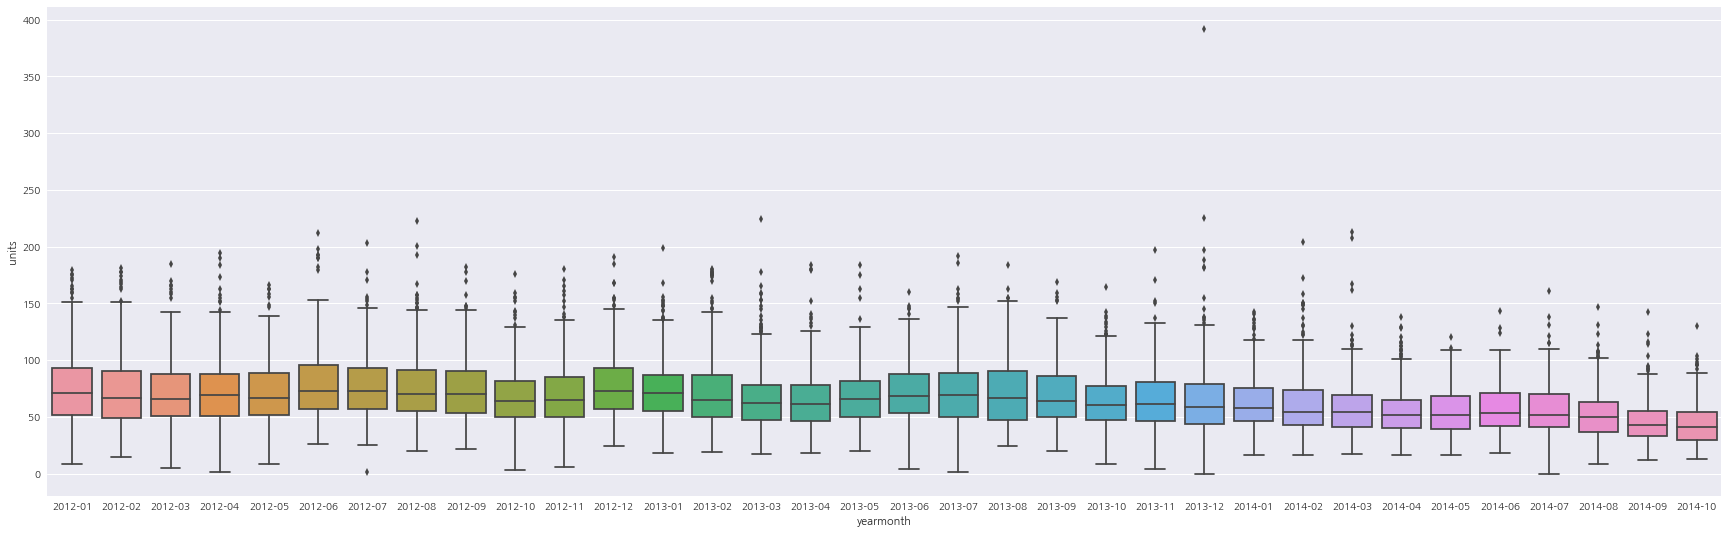

In [60]:
total_copy_item_45 = total_copy[total["item_nbr"] == 45]
plt.figure(figsize=(30,9))
sns.boxplot(x="yearmonth", y="units", data=total_copy_item_45[["yearmonth", "units"]])

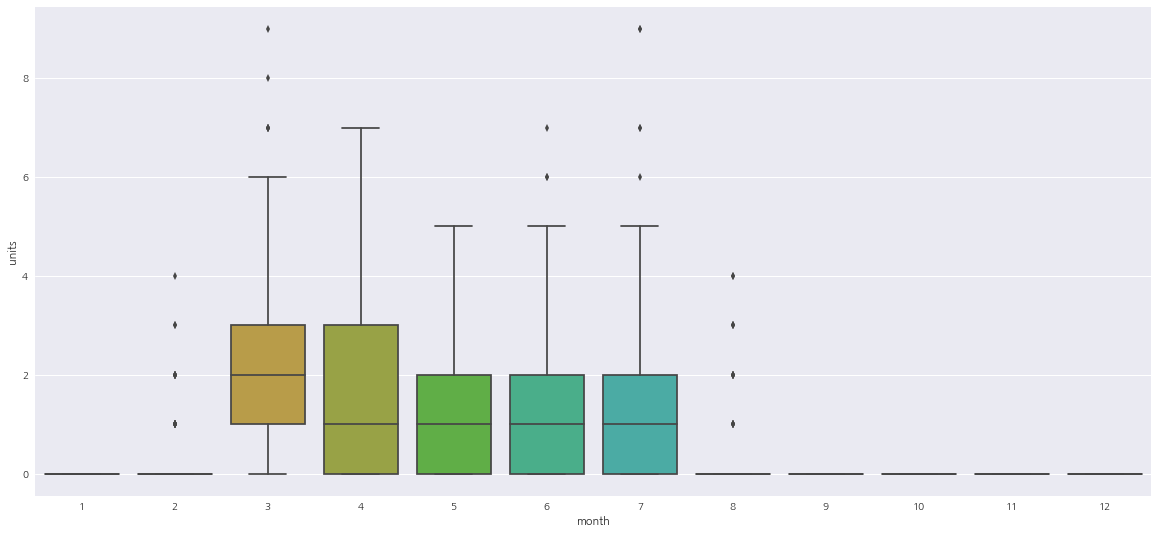

In [38]:
total_item_1 = total[total["item_nbr"] == 1]
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_1[["month", "units"]])

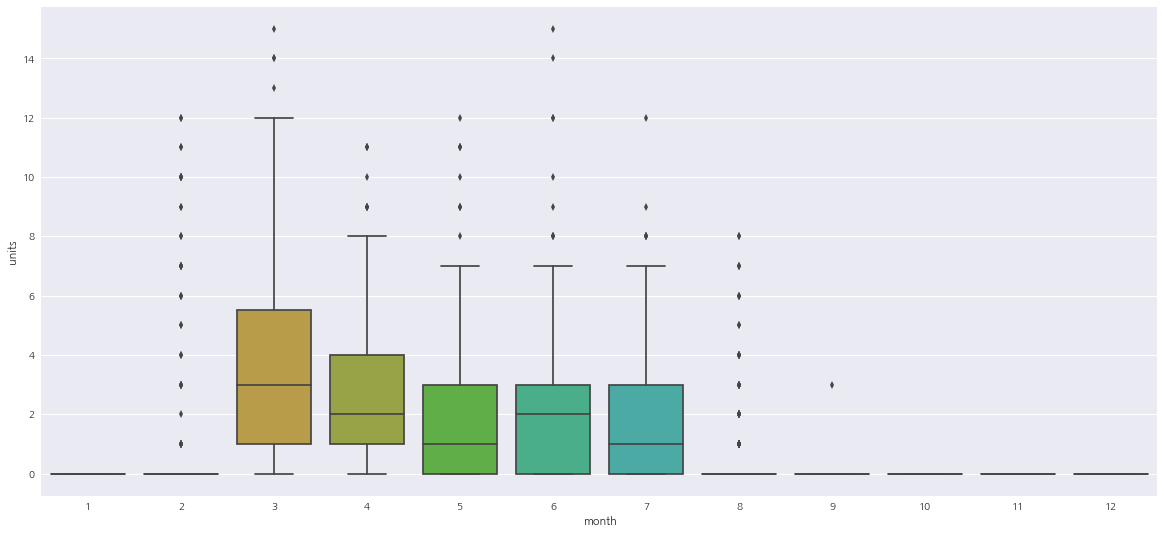

In [44]:
total_item_2 = total[total["item_nbr"] == 2]
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_2[["month", "units"]])

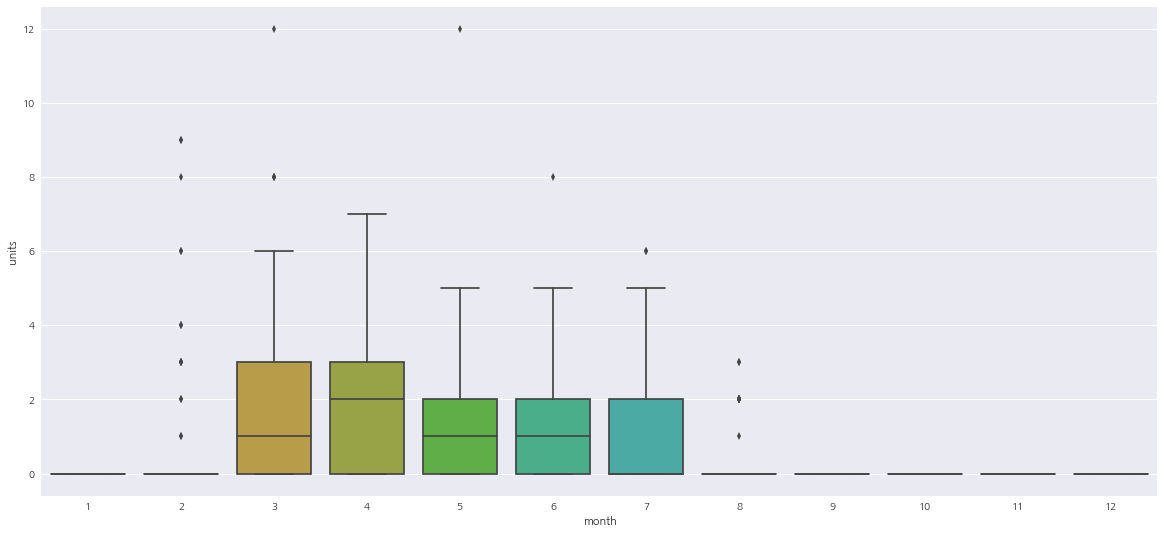

In [45]:
total_item_3 = total[total["item_nbr"] == 3]
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_3[["month", "units"]])

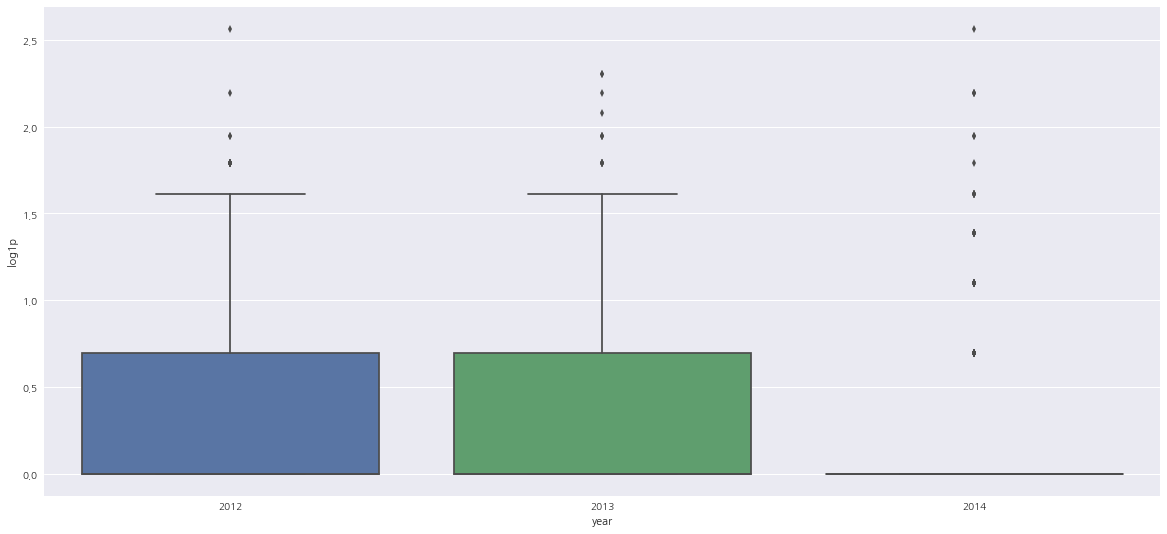

In [55]:
total_item_3 = total[total["item_nbr"] == 3]
plt.figure(figsize=(20,9))
sns.boxplot(x="year", y="log1p", data=total_item_3[["year","month", "log1p"]])

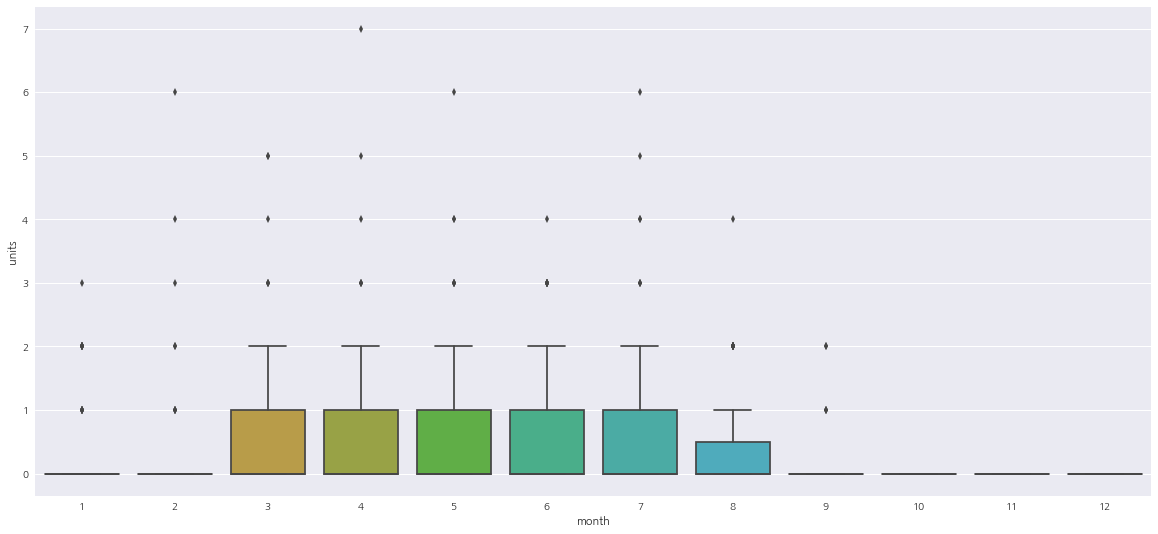

In [46]:
total_item_4 = total[total["item_nbr"] == 4]
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_4[["month", "units"]])

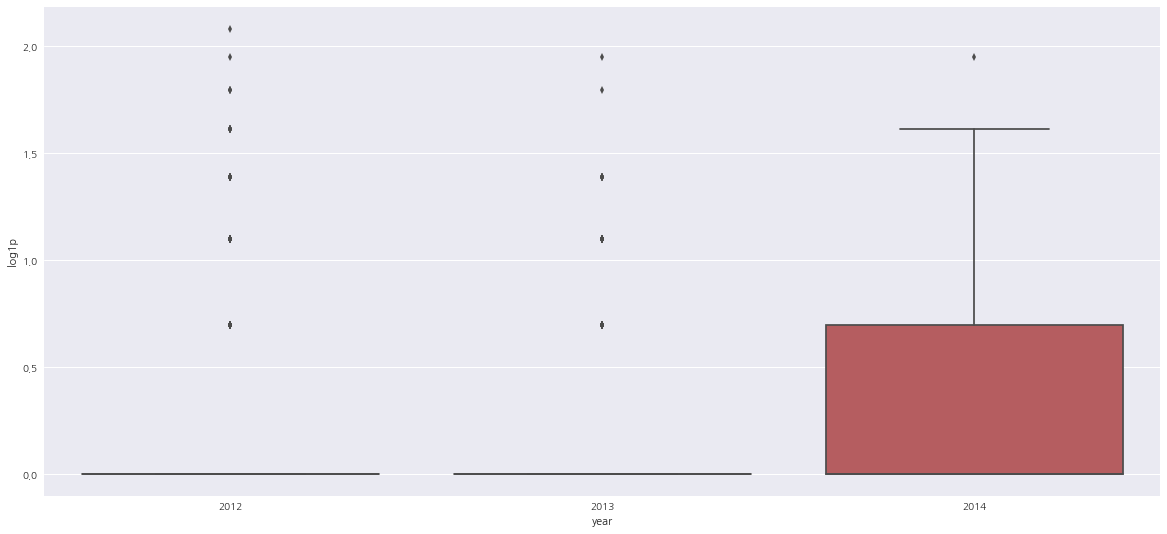

In [54]:
total_item_4 = total[total["item_nbr"] == 4]
plt.figure(figsize=(20,9))
sns.boxplot(x="year", y="log1p", data=total_item_4[["year","month", "log1p"]])

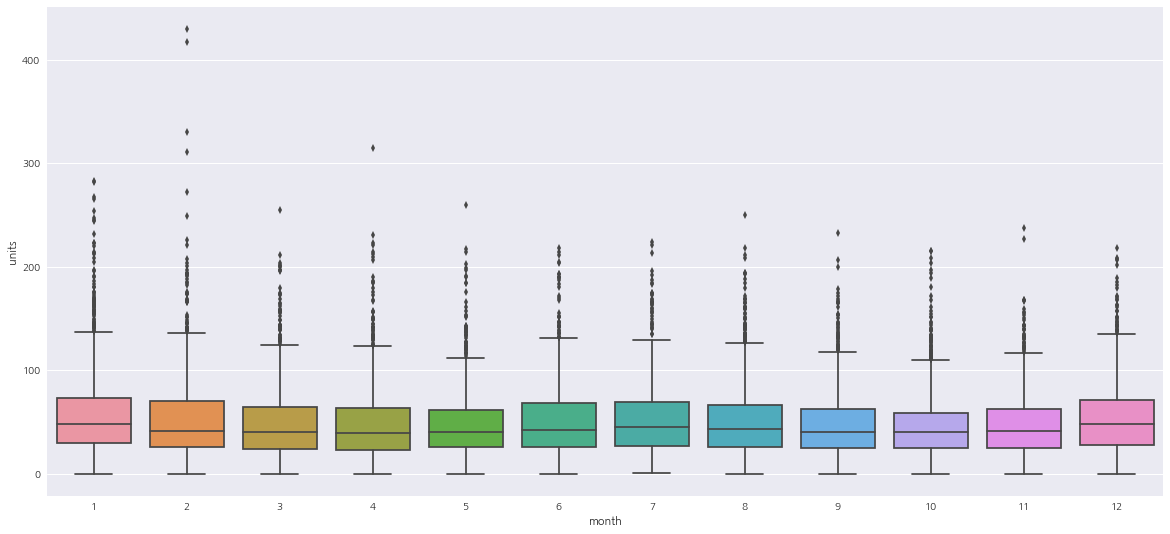

In [48]:
total_item_5 = total_1[total_1["item_nbr"] == 5]
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_5[["month", "units"]])

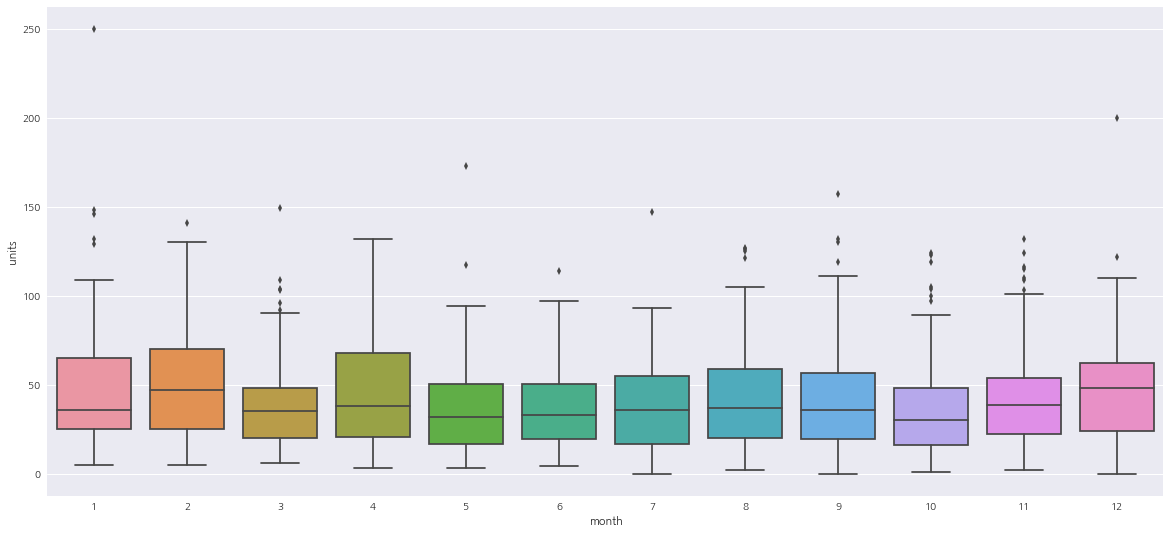

In [50]:
total_item_6 = total[total["item_nbr"] == 6]
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_6[["month", "units"]])

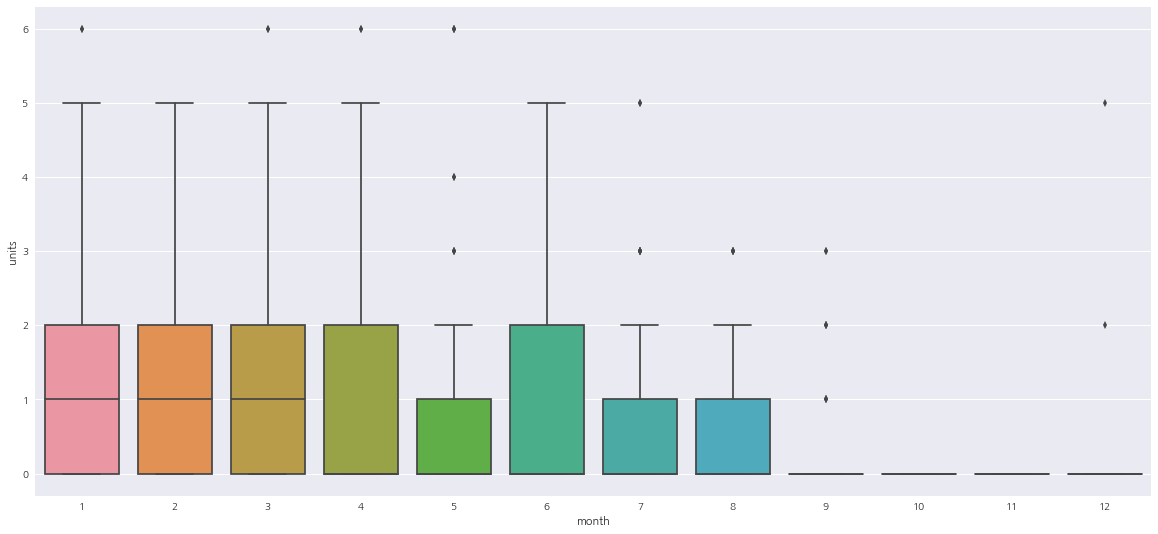

In [51]:
total_item_7 = total[total["item_nbr"] == 7]
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_7[["month", "units"]])

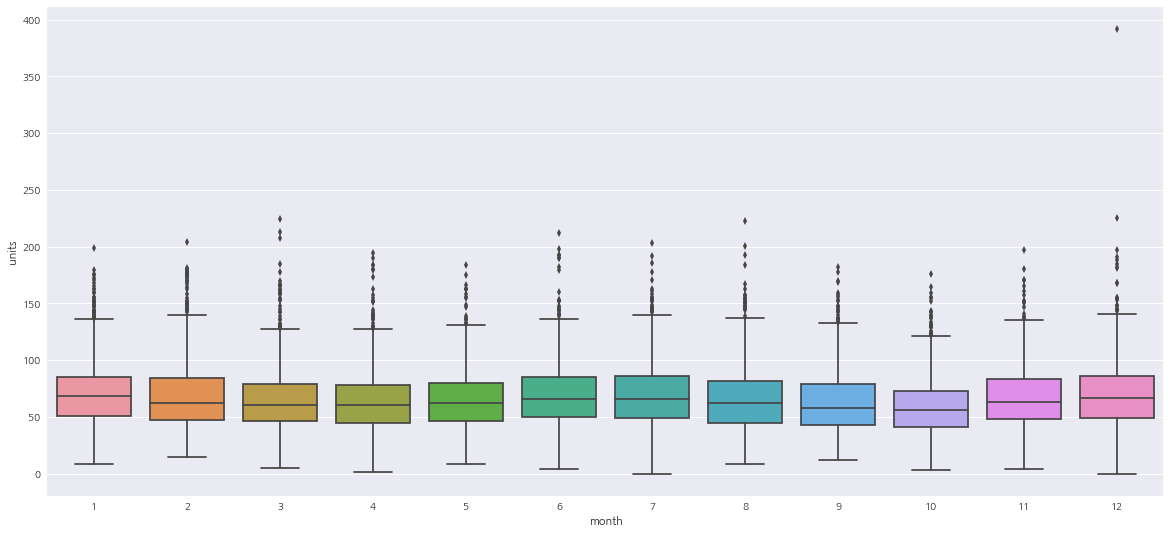

In [52]:
total_item_45 = total[total["item_nbr"] == 45]
plt.figure(figsize=(20,9))
sns.boxplot(x="month", y="units", data=total_item_45[["month", "units"]])

In [61]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + 0", data=total)
# C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend)

In [62]:
# model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + 0", data=total)
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     66.21
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:38:36   Log-Likelihood:            -5.0396e+05
No. Observations:              229230   AIC:                         1.009e+06
Df Residuals:                  228798   BIC:                         1.013e+06
Df Model:                         432                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

In [60]:
# model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + 0", data=total)
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     8.474
Date:                Thu, 05 Jul 2018   Prob (F-statistic):          4.08e-252
Time:                        22:35:15   Log-Likelihood:            -5.1655e+05
No. Observations:              229230   AIC:                         1.034e+06
Df Residuals:                  229014   BIC:                         1.036e+06
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
C(

In [63]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + 0", data=total)
# C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend)

In [64]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     107.6
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:40:42   Log-Likelihood:            -5.0639e+05
No. Observations:              229230   AIC:                         1.013e+06
Df Residuals:                  229014   BIC:                         1.015e+06
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
C(item_nbr)[1]:s

In [68]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(month) + 0", data=total)
# C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend)

In [69]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     931.0
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:55:40   Log-Likelihood:            -2.2986e+05
No. Observations:              229230   AIC:                         4.627e+05
Df Residuals:                  227718   BIC:                         4.784e+05
Df Model:                        1511                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
C(item_nbr)[1]

In [73]:
total["is_weekend"].unique()

array([1, 0], dtype=int64)

In [70]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend) + 0", data=total)

In [71]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     3169.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:00:17   Log-Likelihood:            -2.3325e+05
No. Observations:              229230   AIC:                         4.674e+05
Df Residuals:                  228798   BIC:                         4.718e+05
Df Model:                         431                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(item

In [74]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend) + C(item_nbr):C(month) + 0", data=total)

In [75]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     885.2
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        23:13:19   Log-Likelihood:            -2.2798e+05
No. Observations:              229230   AIC:                         4.592e+05
Df Residuals:                  227610   BIC:                         4.760e+05
Df Model:                        1619                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
C(item

In [ ]:
# month
# ▶R-squared : 0.861
# ▶Cond. No. : 69.4

# is_weekend
# ▶R-squared : 0.857
# ▶Cond. No. : 28.9

# month, is_weekend
# ▶R-squared : 0.863
# ▶Cond. No. : 127

In [65]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(tmax) + C(item_nbr):scale(avgspeed) + 0", data=total)

In [66]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     116.5
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        22:43:21   Log-Likelihood:            -5.0552e+05
No. Observations:              229230   AIC:                         1.011e+06
Df Residuals:                  229014   BIC:                         1.014e+06
Df Model:                         216                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
C(item_n